In [1027]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import patches
import math 

In [1028]:
plt.style.use('seaborn-whitegrid')

In [1029]:
SAVE_DIRECTORY = 'csv/'

In [1030]:
red_df_list = []

In [1031]:
red_num_list = []

In [1032]:
group_num = int(input('Please enter the number of groups. : '))

ValueError: invalid literal for int() with base 10: ''

In [1033]:
for i in range(group_num):
    red_num = int(input('Please enter the number of red by' + str(i + 1) + 'groups. : '))
    red_num_list.append(red_num)
    red_df_list.append([])

ValueError: invalid literal for int() with base 10: ''

In [1034]:
# RedのCSVファイルを読み込み
for i in range(group_num):
    for j in range(red_num_list[i]):
        df = pd.read_csv(SAVE_DIRECTORY + 'red' + str(i + 1) + '-' + str(j + 1) + '.csv')
        red_df_list[i].append(df)

IndexError: list index out of range

In [1035]:
marker_df_list = []

In [1036]:
for i in range(group_num):
    marker_df = pd.read_csv(SAVE_DIRECTORY + 'sub-marker' + str(i + 1) + '.csv')
    marker_df_list.append(marker_df)

In [1037]:
obstacle_num = int(input('Please enter the number of obstacle.'))

In [1038]:

# マップ(全体)のCSVファイルの読み込み
obstacle_df_list = []
for i in range(obstacle_num):
  df = pd.read_csv(SAVE_DIRECTORY + 'obstacle' + str(i + 1) + '.csv')
  obstacle_df_list.append(df)

In [1039]:
x_list = []
y_list = []
for i in range(group_num):
    x_list.append([])
    y_list.append([])
    for j in range(red_num_list[i]):
        x_list[i].append(red_df_list[i][j]['x'])
        y_list[i].append(red_df_list[i][j]['y'])

IndexError: list index out of range

In [1040]:
# ランダムウォークのみの出力
x = x_list[0][0]
y = y_list[0][0]
plt.plot(x, y, '-or', linewidth=0.5)
plt.show()

IndexError: list index out of range

In [1041]:
# マーカーを加えた出力
x = x_list[0][0]
y = y_list[0][0]
plt.plot(x, y, '-or', linewidth=0.5)
plt.plot(marker_df_list[0]['x'], marker_df_list[0]['y'], 'sb')
plt.show()

IndexError: list index out of range

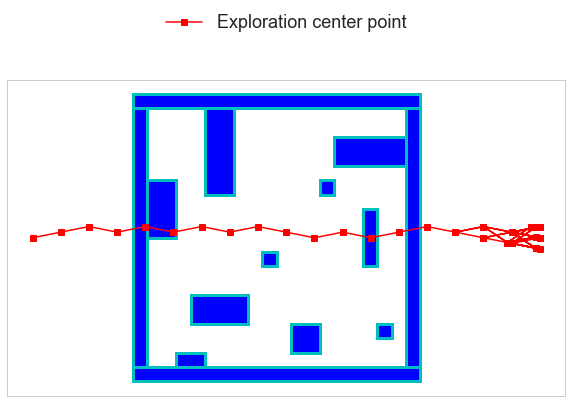

In [1042]:

# 障害物を加えた出力
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(1, 1, 1, aspect="equal")
#x = x_list[0][0]
#y = y_list[0][0]
#plt.plot(x, y, '-or', linewidth=0.5)
plt.plot(marker_df_list[0]['x'], marker_df_list[0]['y'], '-sr', label = "Exploration center point")

for i in range(obstacle_num):
        obstacle = patches.Rectangle(
            xy = (obstacle_df_list[i].iloc[0, 1], obstacle_df_list[i].iloc[0, 2]),
            width = obstacle_df_list[i].iloc[0, 5],
            height = obstacle_df_list[i].iloc[0, 4],
            angle = 0,
            facecolor = "b",
            edgecolor = "c",
            linewidth = 3,
            fill = True,
        )
        ax.add_patch(obstacle)

ax.legend(loc = 'lower center', bbox_to_anchor=(.5, 1.1), fontsize=18)
plt.xticks([])
plt.yticks([])
plt.show()

In [1043]:
label1 = marker_df_list[0][marker_df_list[0]['label'] == 1]
label2 = marker_df_list[0][marker_df_list[0]['label'] == 2]
label3 = marker_df_list[0][marker_df_list[0]['label'] == 3]

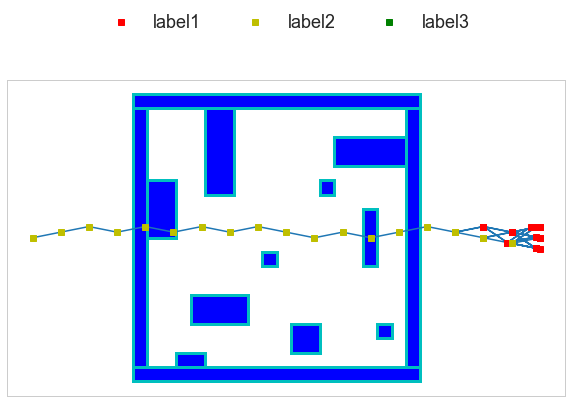

In [1044]:

# ラベルで出力を変える
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(1, 1, 1, aspect="equal")

plt.plot(marker_df_list[0]['x'], marker_df_list[0]['y'], '-')
plt.plot(label1['x'], label1['y'], 'sr', label="label1")
plt.plot(label2['x'], label2['y'], 'sy', label="label2")
plt.plot(label3['x'], label3['y'], 'sg', label="label3")


for i in range(obstacle_num):
        obstacle = patches.Rectangle(
            xy = (obstacle_df_list[i].iloc[0, 1], obstacle_df_list[i].iloc[0, 2]),
            width = obstacle_df_list[i].iloc[0, 5],
            height = obstacle_df_list[i].iloc[0, 4],
            angle = 0,
            facecolor = "b",
            edgecolor = "c",
            linewidth = 3,
            fill = True,
        )
        ax.add_patch(obstacle)

ax.legend(loc = 'lower center', bbox_to_anchor=(.5, 1.1), ncol=3, fontsize=18)
plt.xticks([])
plt.yticks([])
plt.show()

In [1045]:
route_df_list = []
route_num = int(input('Please enter the number of route. : '))
for i in range(route_num):
    route_df = pd.read_csv(SAVE_DIRECTORY + 'route' + str(i + 1) + '.csv')
    route_df_list.append(route_df)

ValueError: invalid literal for int() with base 10: ''

No handles with labels found to put in legend.


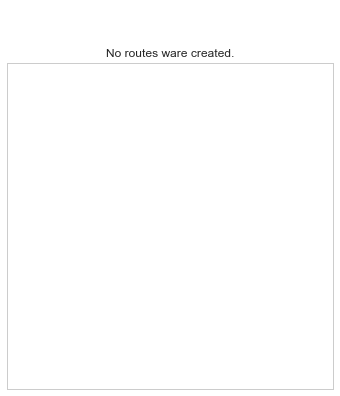

In [1046]:

# 障害物を加えた出力
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(1, 1, 1, aspect="equal")

for i in range(len(route_df_list)):
    label_string = "generated path" + str(i + 1)
    plt.plot(route_df_list[i]['x'], route_df_list[i]['y'], '-s', label = label_string, alpha=0.5+i*0.2)

if len(route_df_list) == 0:
    plt.title("No routes ware created.")

for i in range(obstacle_num):
        obstacle = patches.Rectangle(
            xy = (obstacle_df_list[i].iloc[0, 1], obstacle_df_list[i].iloc[0, 2]),
            width = obstacle_df_list[i].iloc[0, 5],
            height = obstacle_df_list[i].iloc[0, 4],
            angle = 0,
            facecolor = "b",
            edgecolor = "c",
            linewidth = 3,
            fill = True,
        )
        ax.add_patch(obstacle)

ax.legend(loc = 'lower center', bbox_to_anchor=(.5, 1.1), ncol=3, fontsize = 18)
plt.xticks([])
plt.yticks([])
plt.show()

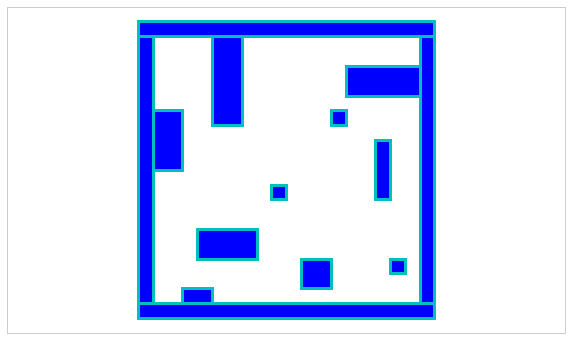

In [1047]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# x_list、y_list、marker_df_list、obstacle_df_list、obstacle_num が定義されていると仮定します

fig, ax = plt.subplots(figsize=(10, 6))

# 元の線とマーカーを描画する必要はありません

for i in range(obstacle_num):
    obstacle = patches.Rectangle(
        xy=(obstacle_df_list[i].iloc[0, 1], obstacle_df_list[i].iloc[0, 2]),
        width=obstacle_df_list[i].iloc[0, 5],
        height=obstacle_df_list[i].iloc[0, 4],
        angle=0,
        facecolor="b",
        edgecolor="c",
        linewidth=3,
        fill=True,
    )
    ax.add_patch(obstacle)

plt.axis("equal")  # 両軸のスケーリングを等しくする
plt.xticks([])
plt.yticks([])
plt.show()


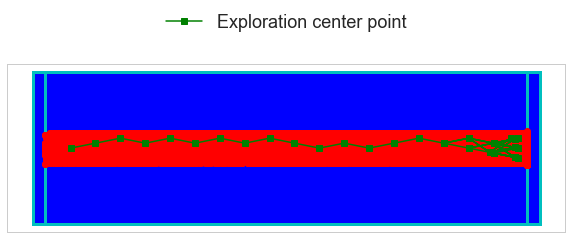

In [949]:
# Red複数台での出力
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(1, 1, 1, aspect="equal")

for i in range(group_num):
    for j in range(red_num_list[i]):
        plt.plot(x_list[i][j], y_list[i][j], '-or', linewidth=0.5)
    
    plt.plot(marker_df_list[i]['x'], marker_df_list[i]['y'], '-sg', label = "Exploration center point")


for i in range(obstacle_num):
        obstacle = patches.Rectangle(
            xy = (obstacle_df_list[i].iloc[0, 1], obstacle_df_list[i].iloc[0, 2]),
            width = obstacle_df_list[i].iloc[0, 5],
            height = obstacle_df_list[i].iloc[0, 4],
            angle = 0,
            facecolor = "b",
            edgecolor = "c",
            linewidth = 3,
            fill = True,
        )
        ax.add_patch(obstacle)

ax.legend(loc = 'lower center', bbox_to_anchor=(.5, 1.1), ncol=3, fontsize=18)
plt.xticks([])
plt.yticks([])
plt.show()

In [142]:
# 動画の作成
%matplotlib nbagg
import itertools
import math
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import patches
from matplotlib import animation

def _update(frame, x, y):
    plt.cla()
    for i in range(group_num):
        for j in range(red_num_list[i]):
            x[i][j].append(x_list[i][j][frame])
            y[i][j].append(y_list[i][j][frame])
    
    for i in range(group_num):
        for j in range(red_num_list[i]):
            plt.plot(x[i][j], y[i][j], '-o', linewidth=0.5)
    
        plt.plot(marker_df_list[i]['x'], marker_df_list[i]['y'], 'sg')
    
    for i in range(obstacle_num):
        obstacle = patches.Rectangle(
            xy = (obstacle_df_list[i].iloc[0, 1], obstacle_df_list[i].iloc[0, 2]),
            width = obstacle_df_list[i].iloc[0, 5],
            height = obstacle_df_list[i].iloc[0, 4],
            angle = 0,
            facecolor = "b",
            edgecolor = "c",
            linewidth = 3,
            fill = True,
        )
        ax.add_patch(obstacle)
    
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=18)
    plt.show()

fig = plt.figure(figsize=(16, 9))
ax = fig.add_subplot(1, 1, 1, aspect="equal")

x = []
y = []
for i in range(group_num):
    x.append([])
    y.append([])
    for j in range(red_num_list[i]):
        x[i].append([])
        y[i].append([])

params = {
    'fig': fig,
    'func': _update,
    'fargs': (x, y),
    'interval': 10,
    'frames': np.arange(0, len(red_df_list[0][0]['step']), 1),
    'repeat': False,
}

anime = animation.FuncAnimation(**params)
anime.save('video/sim_video.gif', writer='pillow')

<IPython.core.display.Javascript object>

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles wi

In [ ]:
# 障害物がない場合の動画の作成
%matplotlib nbagg
import itertools
import math
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import patches
from matplotlib import animation


def _update(frame, x, y):
    plt.cla()
    for i in range(red_num):
        x[i].append(x_list[i][frame])
        y[i].append(y_list[i][frame])
    
    for i in range(group_num):
        for j in range(red_num_list[i]):
            plt.plot(x_list[i][j], y_list[i][j], '-o', linewidth=0.5)
    
        plt.plot(marker_df_list[i]['x'], marker_df_list[i]['y'], 'sb')
    
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=18)
    plt.show()


fig = plt.figure(figsize=(16, 9))
x = []
y = []
for i in range(red_num):
    x.append([])
    y.append([])

params = {
    'fig': fig,
    'func': _update,
    'fargs': (x, y),
    'interval': 10,
    'frames': np.arange(0, len(red_df_list[0]['step']), 1),
    'repeat': False,
}

anime = animation.FuncAnimation(**params)
anime.save('video/sim_video_no_obstacle.gif', writer='pillow')

In [18]:
list1 = [1, 2, 3]
list2 = [4, 5, 6]

# リストを結合して新しいリストを作成
result_list = list1 + list2

print(result_list)

[1, 2, 3, 4, 5, 6]


In [278]:
def normalize_list(lst, target_sum=40):
    current_sum = sum(lst)
    if current_sum == 0:
        # リストがすべてゼロの場合は正規化の意味がないので何もせずに返す
        return lst

    scaling_factor = target_sum / current_sum
    normalized_list = [element * scaling_factor for element in lst]

    return normalized_list

# 例: リストの要素が[10, 20, 5]の場合
original_list = [6, 3, 1, 2, 1]
normalized_result = normalize_list(original_list, target_sum=40)

print("Original List:", original_list)
print("Normalized List (Sum = 40):", normalized_result)


Original List: [6, 3, 1, 2, 1]
Normalized List (Sum = 40): [18.461538461538463, 9.230769230769232, 3.076923076923077, 6.153846153846154, 3.076923076923077]


In [281]:
def normalize_list_with_lower_bound(lst, target_sum=30, lower_bound=5):
    current_sum = sum(lst)

    if current_sum == 0:
        # リストがすべてゼロの場合は正規化の意味がないので何もせずに返す
        return lst

    scaling_factor = target_sum / current_sum

    normalized_list = [max(int(element * scaling_factor), lower_bound) for element in lst]

    # 正規化後の合計が30にならない場合、調整が必要
    adjustment = target_sum - sum(normalized_list)
    if adjustment != 0:
        # 正規化後の合計が30になるように、調整が必要な要素に調整を行う
        for i in range(len(lst)):
            if normalized_list[i] + adjustment >= lower_bound:
                normalized_list[i] += adjustment
                break

    return normalized_list

# 例: リストの要素が[10, 20, 5]の場合
original_list = [10, 20, 5]
normalized_result = normalize_list_with_lower_bound(original_list, target_sum=30, lower_bound=5)

print("Original List:", original_list)
print("Normalized List (Sum = 30, Lower Bound = 5):", normalized_result)


Original List: [10, 20, 5]
Normalized List (Sum = 30, Lower Bound = 5): [8, 17, 5]


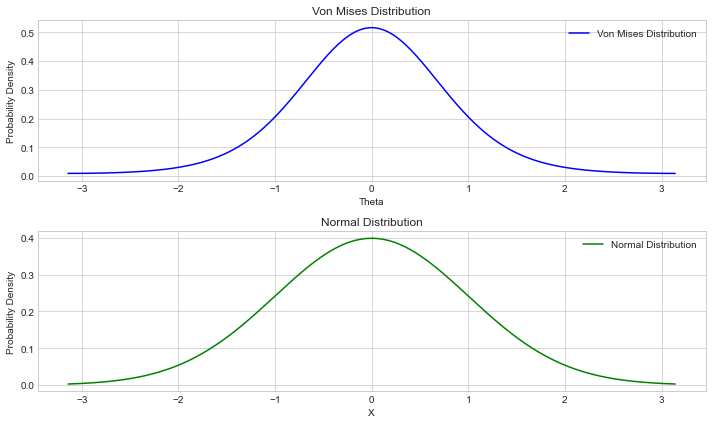

In [1053]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import vonmises, norm

# パラメータの設定
mu_vonmises = 0  # フォンミーゼス分布の平均方向
kappa_vonmises = 2  # フォンミーゼス分布の集中度

mu_normal = 0  # 正規分布の平均
sigma_normal = 1  # 正規分布の標準偏差

# データの生成
theta = np.linspace(-np.pi, np.pi, 1000)

# フォンミーゼス分布の確率密度関数
pdf_vonmises = vonmises.pdf(theta, kappa_vonmises)

# 正規分布の確率密度関数
pdf_normal = norm.pdf(theta, mu_normal, sigma_normal)

# プロット
plt.figure(figsize=(10, 6))

# フォンミーズ分布
plt.subplot(2, 1, 1)
plt.plot(theta, pdf_vonmises, label='Von Mises Distribution', color='blue')
plt.title('Von Mises Distribution')
plt.xlabel('Theta')
plt.ylabel('Probability Density')
plt.legend()

# 正規分布
plt.subplot(2, 1, 2)
plt.plot(theta, pdf_normal, label='Normal Distribution', color='green')
plt.title('Normal Distribution')
plt.xlabel('X')
plt.ylabel('Probability Density')
plt.legend()

plt.tight_layout()
plt.show()
